In [7]:
# import matplotlip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
# import file mean_pinball_loss.csv from the folder results
data = pd.read_csv('results/mean_pinball_loss.csv')


# add _pv to index name if variable == photovoltaic
#data['index'] = data['variable'].apply(lambda x: x + '_pv' if x == 'photovoltaic' else x)

print(data
)

train_data = pd.read_csv('results/training_mean_pinball_loss.csv')

print(train_data)

              index      variable        value
0     mean_loc_1_hr  photovoltaic   157.113063
1    southwest_1_hr  photovoltaic   197.841302
2    northwest_1_hr      offshore   200.138549
3    southeast_1_hr  photovoltaic   202.767624
4    northeast_1_hr  photovoltaic   222.137222
5    northwest_1_hr  photovoltaic   233.694641
6    mean_loc_24_hr  photovoltaic   253.154469
7   northwest_24_hr  photovoltaic   253.484304
8   northeast_24_hr  photovoltaic   261.078721
9   southwest_24_hr  photovoltaic   267.520399
10  southeast_24_hr  photovoltaic   271.937444
11    mean_loc_1_hr      offshore   281.357517
12   northeast_1_hr      offshore   284.039254
13  northwest_24_hr      offshore   347.524946
14   mean_loc_24_hr      offshore   352.936267
15   southwest_1_hr      offshore   354.400016
16   southeast_1_hr      offshore   365.331715
17  northeast_24_hr      offshore   365.644890
18  southeast_24_hr      offshore   366.379478
19  southwest_24_hr      offshore   368.735127
20    mean_lo

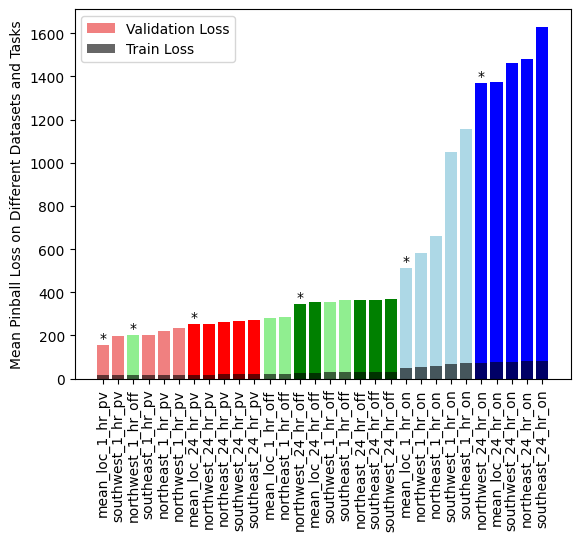

In [71]:
# plot all of the values in one bar graph
# make color by variable
data = pd.read_csv('results/mean_pinball_loss.csv')
train_data = pd.read_csv('results/training_mean_pinball_loss.csv')

x = data['index'].values
# add _pv to index name if variable == photovoltaic
for i in range(len(x)):
    if data['variable'].values[i] == 'photovoltaic':
        x[i] = x[i] + '_pv'
    if data['variable'].values[i] == 'onshore':
        x[i] = x[i] + '_on'
    if data['variable'].values[i] == 'offshore':
        x[i] = x[i] + '_off'

    
colors = []
for index in range(len(x)):
    if data['variable'].values[index] == 'photovoltaic':
        if '_1_hr' in x[index]:
            colors.append('lightcoral')
        else:
            colors.append('red')
    
    if data['variable'].values[index] == 'onshore':
        if '_1_hr' in x[index]:
            colors.append('lightblue')
        else:
            colors.append('blue')

    if data['variable'].values[index] == 'offshore':
        if '_1_hr' in x[index]:
            colors.append('lightgreen')
        else:
            colors.append('green')


plt.bar(x, data['value'].values, color=colors, label = 'Validation Loss')

# add grey bars for train loss
plt.bar(x, train_data['value'].values, color='black', alpha = 0.6, label = 'Train Loss')

# add asteriks at indexes 0, 3, 7
marking = [0, 2, 6, 13, 20, 25]
for mark in marking:
    plt.text(mark, data['value'].values[mark], '*', ha='center', va='bottom')

# ylabel is mean pinball loss on validation set
plt.ylabel('Mean Pinball Loss on Different Datasets and Tasks')

# turn x labels 90 degrees
plt.xticks(rotation=90);
plt.legend();

# save the plot
plt.savefig('results/mean_pinball_loss.png')